In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

# K-fold cross validation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold

import time
# to save the models
import pickle

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from ipynb.fs.full.ML_algorithms import decision_tree_regressor
from ipynb.fs.full.ML_algorithms import random_forest_regressor
from ipynb.fs.full.ML_algorithms import gradient_boosting_regressor
# from ipynb.fs.full.F03_ML_functions import 

In [69]:
# pip install ipynb

In [71]:
df = pd.read_csv("bmw_used_cars.csv")
df = df.drop('year', axis=1)
display(df.head())
display(df.info())
display(df.describe())

,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,road_tax_range_450_600,mileage_range_Excellent,mileage_range_Good,mileage_range_Medium,mileage_range_Bad,car_age_range_<=5,car_age_range_5<age<=10,car_age_range_10<age<=15,car_age_range_15<age<=20,car_age_range_20<age<=25
0,11200,67068,125,57.6,2.0,7,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,27000,14827,145,42.8,2.0,3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,16000,62794,160,51.4,3.0,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12750,26676,145,72.4,1.5,4,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,14500,39554,160,50.4,3.0,7,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     10781 non-null  int64  
 1   mileage                   10781 non-null  int64  
 2   tax                       10781 non-null  int64  
 3   mpg                       10781 non-null  float64
 4   engineSize                10781 non-null  float64
 5   car_age                   10781 non-null  int64  
 6   model_ 1 Series           10781 non-null  int64  
 7   model_ 2 Series           10781 non-null  int64  
 8   model_ 3 Series           10781 non-null  int64  
 9   model_ 4 Series           10781 non-null  int64  
 10  model_ 5 Series           10781 non-null  int64  
 11  model_ 6 Series           10781 non-null  int64  
 12  model_ 7 Series           10781 non-null  int64  
 13  model_ 8 Series           10781 non-null  int64  
 14  model_

None

,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,road_tax_range_450_600,mileage_range_Excellent,mileage_range_Good,mileage_range_Medium,mileage_range_Bad,car_age_range_<=5,car_age_range_5<age<=10,car_age_range_10<age<=15,car_age_range_15<age<=20,car_age_range_20<age<=25
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,...,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.00000,10781.000000,10781.000000,10781.000000,10781.000000
mean,22733.408867,25496.986550,131.702068,56.399035,2.167767,3.921065,0.182636,0.113997,0.226602,0.092292,...,0.003803,0.842501,0.146090,0.010667,0.000742,0.80410,0.180874,0.011502,0.002690,0.000835
std,11415.528189,25143.192559,61.510755,31.336958,0.552054,2.349038,0.386386,0.317822,0.418653,0.289451,...,0.061554,0.364288,0.353213,0.102733,0.027232,0.39691,0.384931,0.106632,0.051797,0.028882
min,1200.000000,1.000000,0.000000,5.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,14950.000000,5529.000000,135.000000,45.600000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
50%,20462.000000,18347.000000,145.000000,53.300000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,27940.000000,38206.000000,145.000000,62.800000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,123456.000000,214000.000000,580.000000,470.800000,6.600000,25.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [72]:
def variance_threshold_selector(data, threshold):
    """
    This function removes the features with a variance lower than the threshold
    Args:
        data (dataFrame): pandas DataFrame
        threshold (float): Features with variance lower than this threshold will be removed
    Returns:
        a dataFrame with the actual index and column names
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [73]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params', 'rank_test_score']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    
    # return a dataframe
    return cross_val_result

In [74]:
df = variance_threshold_selector(df, 0.01)

display(df.head())
display(df.info())

,price,mileage,tax,mpg,engineSize,car_age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,Engine_Size_medium,Engine_Size_large,road_tax_range_below_150,road_tax_range_150_300,mileage_range_Excellent,mileage_range_Good,mileage_range_Medium,car_age_range_<=5,car_age_range_5<age<=10,car_age_range_10<age<=15
0,11200,67068,125,57.6,2.0,7,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,27000,14827,145,42.8,2.0,3,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,16000,62794,160,51.4,3.0,5,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,12750,26676,145,72.4,1.5,4,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,14500,39554,160,50.4,3.0,7,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     10781 non-null  int64  
 1   mileage                   10781 non-null  int64  
 2   tax                       10781 non-null  int64  
 3   mpg                       10781 non-null  float64
 4   engineSize                10781 non-null  float64
 5   car_age                   10781 non-null  int64  
 6   model_ 1 Series           10781 non-null  int64  
 7   model_ 2 Series           10781 non-null  int64  
 8   model_ 3 Series           10781 non-null  int64  
 9   model_ 4 Series           10781 non-null  int64  
 10  model_ 5 Series           10781 non-null  int64  
 11  model_ M4                 10781 non-null  int64  
 12  model_ X1                 10781 non-null  int64  
 13  model_ X2                 10781 non-null  int64  
 14  model_

None

In [75]:
train = df.drop('price', axis=1)
y = df[['price']]

# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8624, 32) (2157, 32) (8624, 1) (2157, 1)


In [76]:
model_DT = decision_tree_regressor(X_train, y_train, 
                                   ['mse'], 
                                   ['auto'], 
                                   np.arange(10,11,1).tolist(),
                                   np.arange(3,4,1).tolist(), 
                                   'neg_root_mean_squared_error', 
                                   5)

model_RF = random_forest_regressor(X_train, y_train, 
                                   ['mse'], 
                                   np.arange(200,201,100).tolist(), 
                                   [False], 
                                   ['auto'],
                                   np.arange(10,11,1).tolist(), 
                                   np.arange(3,4,1).tolist(), 
                                   'neg_root_mean_squared_error', 
                                   5)

model_GB = gradient_boosting_regressor(X_train, y_train, 
                                       ['mse'],
                                       np.arange(4,5,1).tolist(), 
                                       np.arange(400,401,100).tolist(), 
                                       [0.1], 
                                       'neg_root_mean_squared_error', 
                                       5)

time =  0.04355058272679647
time =  11.620043969154358
time =  0.41227078437805176


In [77]:
def model_output(X_test, y_test, model):
    
    print(model.best_params_)
    
    cv = cv_result(model)
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    display(cv.head())
    print("MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

In [78]:
cv_DT, y_pred_DT, MAE_DT, RMSE_DT, r2_DT = model_output(X_test, y_test, model_DT)
cv_RF, y_pred_RF, MAE_RF, RMSE_RF, r2_RF = model_output(X_test, y_test, model_RF)
cv_GB, y_pred_GB, MAE_GB, RMSE_GB, r2_GB = model_output(X_test, y_test, model_GB)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3}


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,mse,6,auto,3,-3570.363690,-4126.595428,-3857.804750,-4248.483215,-4954.734486,-4151.596314,464.583230
1,mse,6,auto,4,-3570.363690,-4132.972646,-3847.111517,-4377.490824,-4955.930474,-4176.773830,474.489500
2,mse,6,auto,5,-3630.516653,-4023.725992,-3840.692689,-4340.644511,-5106.812402,-4188.478450,514.958529
3,mse,6,auto,6,-3662.353639,-4053.634882,-3911.783928,-4403.351141,-5111.509672,-4228.526652,502.332077
4,mse,7,auto,3,-3345.476390,-3737.643102,-3533.231714,-4054.482978,-4650.619511,-3864.290739,458.103494


MAE :  2180.592234531717 RMSE :  3477.7621412213884 r2_score : 0.9064700220299986
{'bootstrap': False, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 200}


,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,False,mse,9,auto,1,200,-2968.834650,-3331.558168,-3209.439281,-3738.815787,-4357.392884,-3521.208154,486.793883
1,False,mse,9,auto,1,300,-2968.401796,-3332.690467,-3209.148919,-3734.319179,-4357.397196,-3520.391511,486.444209
2,False,mse,9,auto,1,400,-2968.162225,-3334.155370,-3207.955644,-3731.554183,-4357.568577,-3519.879199,486.356054
3,False,mse,9,auto,2,200,-2955.607651,-3347.952404,-3273.413212,-3681.262101,-4344.923017,-3520.631677,472.323109
4,False,mse,9,auto,2,300,-2955.618400,-3344.924166,-3273.382295,-3680.505189,-4344.924129,-3519.870836,472.495520


MAE :  2177.7047794861437 RMSE :  3472.465983404757 r2_score : 0.9067546719450328
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}


,param_criterion,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,mse,0.1,4,400,-2198.00258,-2469.594486,-2586.839234,-2753.80119,-3588.596642,-2719.366826,470.853833


MAE :  1646.1131247853812 RMSE :  2759.8883386492626 r2_score : 0.9410974489905984


In [80]:
OUT = pd.DataFrame({'actual':np.squeeze(y_test.values), 'DT':y_pred_DT, 'RF':y_pred_RF, 'GB':y_pred_GB})
OUT = OUT.round()
display(OUT)

,actual,DT,RF,GB
0,15300,14896.0,14896.0,14576.0
1,15495,13004.0,13004.0,13311.0
2,39875,38995.0,38995.0,41229.0
3,21730,21553.0,21553.0,20686.0
4,13799,17852.0,17852.0,16566.0
...,...,...,...,...
2152,12000,12402.0,12402.0,13036.0
2153,11759,10287.0,10287.0,10584.0
2154,21460,23592.0,23592.0,23185.0
2155,52991,50377.0,50377.0,50211.0


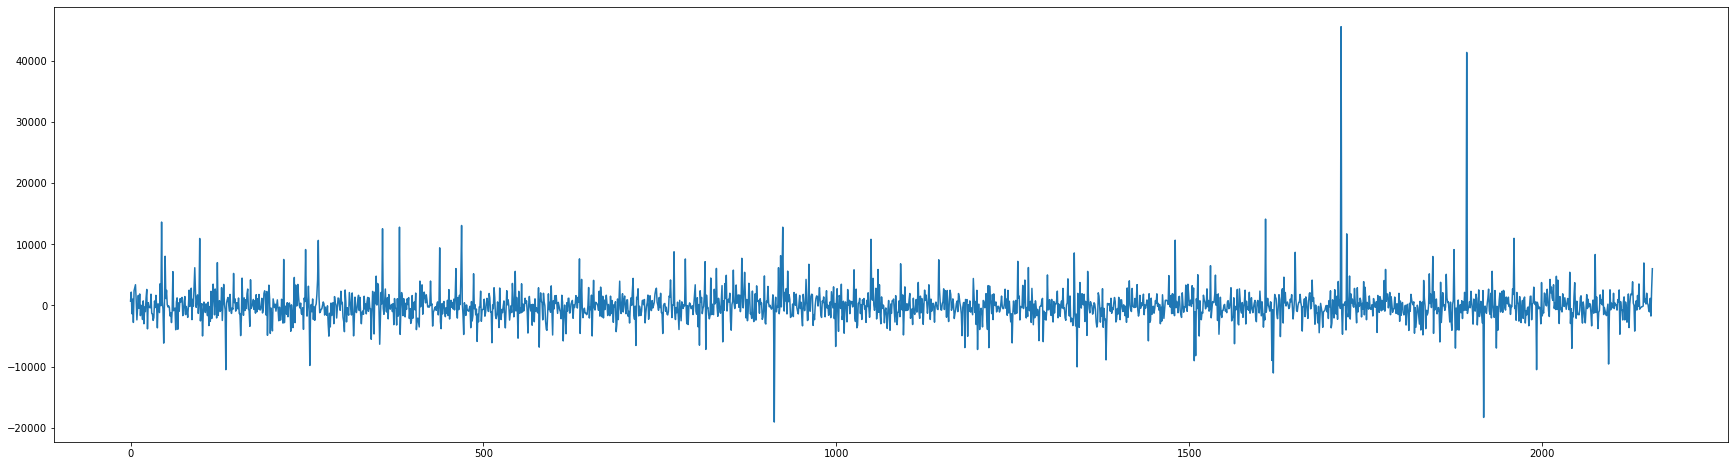

In [81]:
plt.figure(figsize=(30,8))
plt.plot(OUT.index, OUT.actual-OUT.GB)
# plt.plot(OUT.index, OUT.GB)